In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
data = pd.read_csv(r"E:\参加点比赛\数模研赛\data\碳排放及各指标关联关系数据.csv")

In [13]:
system = data.loc[:, ['时间']]
system['区域生产总值'] = data['农林消费部门的生产总值'] + data['能源供应部门的生产总值'] + data['工业消费部门的生产总值'] + data['交通消费部门的生产总值'] + data['建筑消费部门的生产总值']
system['常驻人口总量'] = data['常驻人口总量']
system['区域能源消费量'] = data['农林消费部门的能源消费量'] + data['工业消费部门的能源消费量'] + data['交通消费部门的能源消费量'] + data['建筑消费部门的能源消费量'] + data['居民生活消费的能源消费量'] + data['能源供应部门的能源消费量']
system['区域碳排放量'] = data['农林消费部门的碳排放量'] + data['工业消费部门的碳排放量'] + data['交通消费部门的碳排放量'] + data['建筑消费部门的碳排放量'] + data['居民生活消费的碳排放量'] + data['能源供应部门的碳排放量']
print(system.columns)

# 选择自变量与因变量
X = system.loc[:, ['区域生产总值', '常驻人口总量', '区域能源消费量']].values
y = system['区域碳排放量'].values

# 创建线性回归模型
model = LinearRegression()

# 多元线性回归拟合模型
model.fit(X, y)

# 输出参数
coef = model.coef_
intercept = model.intercept_
R2 = model.score(X, y)
print("回归系数为: ", coef)
print("截距为: ", intercept)
print("模型R2为: ", R2)

# 输出预测值
system['区域碳排放量回归值'] = 99
for i in range(system.shape[0]):
    system.loc[i, ['区域碳排放量回归值']] = intercept + np.dot(coef, X[i])

Index(['时间', '区域生产总值', '常驻人口总量', '区域能源消费量', '区域碳排放量'], dtype='object')
回归系数为:  [ -0.07638384 -64.35577794   8.28438291]
截距为:  401071.491368897
模型R2为:  0.9670779240263652


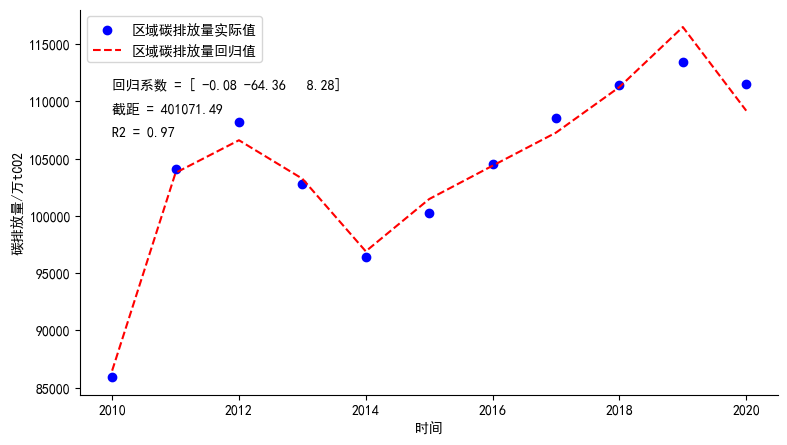

In [16]:
# 绘制回归曲线
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题

fig = plt.figure(figsize=(9, 5))
ax = fig.subplots()
ax.scatter(system['时间'], system['区域碳排放量'], c='b', label='区域碳排放量实际值')
ax.plot(system['时间'], system['区域碳排放量回归值'], c='r', linestyle='--', label='区域碳排放量回归值')
ax.set_xlabel('时间')
ax.set_ylabel('碳排放量/万tCO2')
ax.legend()
ax.spines['right'].set_color(None)
ax.spines['top'].set_color(None)
ax.text(system['时间'][0], 111000, '回归系数 = '+str(np.round(coef, 2)))
ax.text(system['时间'][0], 109000, '截距 = '+str(np.round(intercept, 2)))
ax.text(system['时间'][0], 107000, 'R2 = '+str(np.round(R2, 2)))

plt.savefig(r"E:\参加点比赛\数模研赛\results\T1\区域碳排放量回归图.jpg", dpi=600)

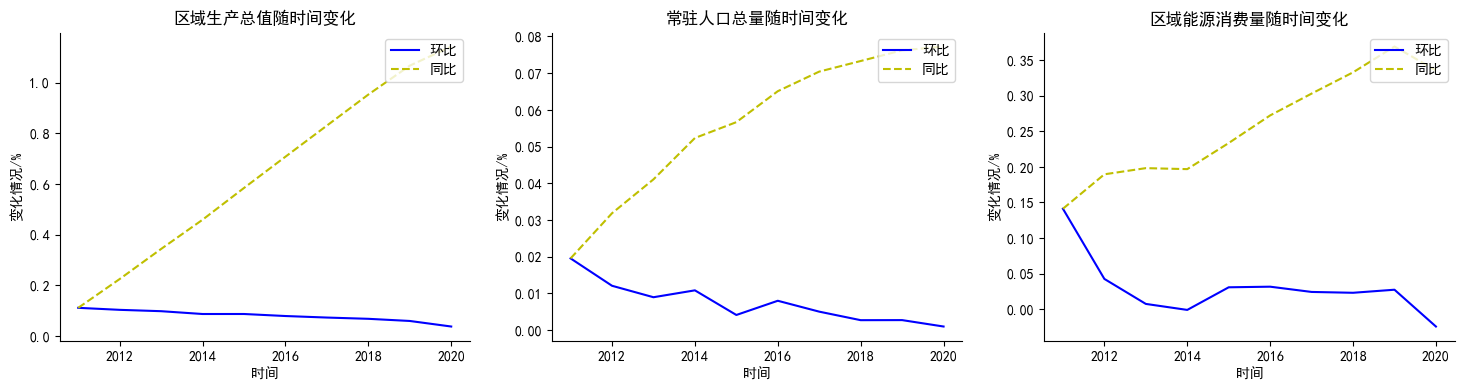

In [16]:
# 绘制回归曲线
import matplotlib.pyplot as plt
from pylab import * 
import seaborn as sns
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体（解决中文无法显示的问题）
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像时负号“-”显示方块的问题
fig = plt.figure(figsize=(18, 4))
(ax1, ax2, ax3) = fig.subplots(1, 3)

# 相关指标变化
x = system['时间']
y = system['区域生产总值'].values
y1 = []
y2 = []
for i in range(1, len(y)):
    qoq = (y[i] - y[i-1]) / y[i-1] # 计算环比，与前一年
    y1.append(qoq)
    yoy = (y[i] - y[0]) / y[0] # 计算同比，与同一年
    y2.append(yoy)
x=x[1: ] # 从2011年开始展示
ax1.plot(x, y1, c='b', linestyle='-', label='环比')
ax1.plot(x, y2, c='y', linestyle='--', label='同比')
ax1.spines['right'].set_color(None)
ax1.spines['top'].set_color(None)
ax1.legend(loc=1)
ax1.set_xlabel('时间')
ax1.set_ylabel('变化情况/%')
ax1.set_title('区域生产总值随时间变化')

# 相关指标变化
x = system['时间']
y = system['常驻人口总量'].values
y1 = []
y2 = []
for i in range(1, len(y)):
    qoq = (y[i] - y[i-1]) / y[i-1] # 计算环比，与前一年
    y1.append(qoq)
    yoy = (y[i] - y[0]) / y[0] # 计算同比，与同一年
    y2.append(yoy)
x=x[1: ] # 从2011年开始展示
ax2.plot(x, y1, c='b', linestyle='-', label='环比')
ax2.plot(x, y2, c='y', linestyle='--', label='同比')
ax2.spines['right'].set_color(None)
ax2.spines['top'].set_color(None)
ax2.legend(loc=1)
ax2.set_xlabel('时间')
ax2.set_ylabel('变化情况/%')
ax2.set_title('常驻人口总量随时间变化')

# 相关指标变化
x = system['时间']
y = system['区域能源消费量'].values
y1 = []
y2 = []
for i in range(1, len(y)):
    qoq = (y[i] - y[i-1]) / y[i-1] # 计算环比，与前一年
    y1.append(qoq)
    yoy = (y[i] - y[0]) / y[0] # 计算同比，与同一年
    y2.append(yoy)
x=x[1: ] # 从2011年开始展示
ax3.plot(x, y1, c='b', linestyle='-', label='环比')
ax3.plot(x, y2, c='y', linestyle='--', label='同比')
ax3.spines['right'].set_color(None)
ax3.spines['top'].set_color(None)
ax3.legend(loc=1)
ax3.set_xlabel('时间')
ax3.set_ylabel('变化情况/%')
ax3.set_title('区域能源消费量随时间变化')

plt.savefig(r"E:\参加点比赛\数模研赛\results\T1\相关指标变化（环比与同比）.jpg", dpi=600)